In [1]:
# Importing needed libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import ensemble
from sklearn import model_selection
from patsy import dmatrices
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=DataConversionWarning)

**Data Extraction:** *download a publicly available dataset*  

In [2]:
# Downloading a publicly available dataset (https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv).
df = sns.load_dataset('mpg')

**Data Extraction:** *describe the dataset*  

**1. Title:** Auto-Mpg Data

**2. Sources:** (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition. (c) Date: July 7, 1993.

**3. Past Usage:** See 2b (above). Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

**4. Relevant Information:** This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993).

**5. Number of Instances:** 398.

**6. Number of Attributes:** 9 including the class attribute.

**7. Attribute Information:**

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

**8. Missing Attribute Values:** horsepower has 6 missing values.


**Data Extraction:** *describe the question you intend to answer with the dataset*

1. Question #1: What is the mpg by continent (origin).
2. Question #2: What is the horsepower by continent (origin)?
3. Question #3: What is the displacement by continent (origin)?
3. Question #4: What is the weight by continent (origin)?
4. Question #5: Predict what the 'origin', 'disp_div10', 'wt_div100', 'hp_div10', 'mpg'

In [3]:
# Describing the dataset (info).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# Describing the dataset (describe).
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
# Evaluating a categorical data column prior to data cleanup. Raw data is a mix of both countries and continents.  
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [6]:
# Data Cleanup #1: cleaning up the 'origin' column so that it represents only continents.
df.origin = df.origin.replace(['usa', 'japan', 'europe'],['North America', 'Asia', 'Europe'] )

In [7]:
# Checking to ensure Data Cleanup #1 was processed correctly.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,North America,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,North America,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,North America,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,North America,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,North America,ford torino


In [8]:
# Data Cleanup #2: filling in missing ‘horsepower’ data. Looking for index of missing ‘horsepower’ date within dataset. 
np.isnan(df.horsepower)
idx = np.argwhere(np.isnan(df.horsepower))

In [9]:
# Data Cleanup #2: creating a list of the missing ‘horsepower’ data (researched and found on https://en.wikipedia.org).
missing_hp = [100,120,51,88,81,82]
idx

array([[ 32],
       [126],
       [330],
       [336],
       [354],
       [374]], dtype=int64)

In [10]:
# Data Cleanup #2: filling in missing ‘horsepower’ data based on index of missing data and researched/found data. 
df.iloc[32,3] = 100
df.iloc[126,3] = 120
df.iloc[330,3] = 51
df.iloc[336,3] = 88
df.iloc[354,3] = 81
df.iloc[374,3] = 82

In [11]:
# Checking to ensure Data Cleanup #2 was processed correctly and we have a clean dataset. 
idx = np.argwhere(np.isnan(df.horsepower))
idx

array([], shape=(0, 1), dtype=int64)

**Data Visualization Section:** *answering intended questions about the dataset (as noted above)*
1. Visualize important dimensions of the data
2. Outlining trends.


In [12]:
# Setting up specific columns list for a ‘pairplot’ in order to visualize important dimensions of the data and identify trends. 
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

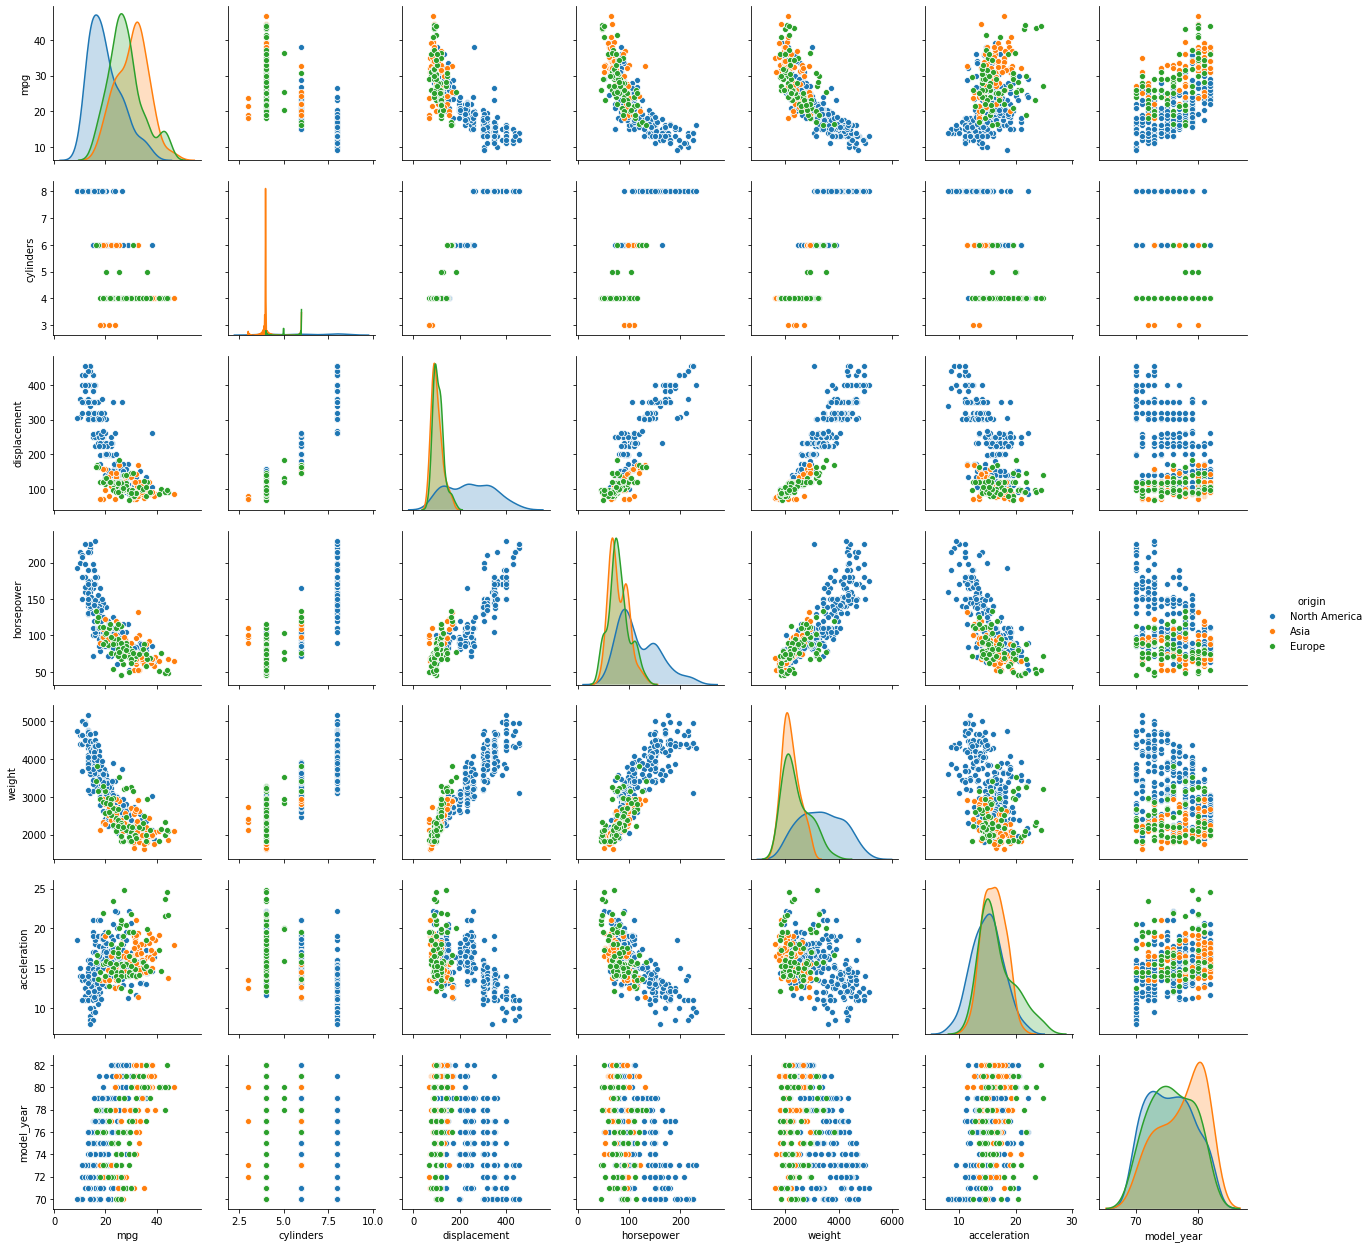

In [13]:
# Running 'pairplot' based on specific column list specified above. 
sns.pairplot(df[cols], hue='origin')

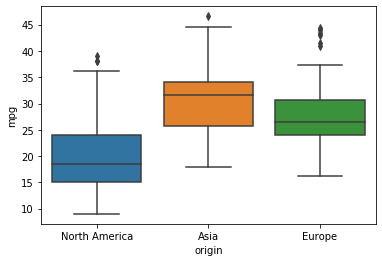

In [14]:
# Question #1: What is the mpg by continent (origin)?
# Trend: Asia is getting the best gas mileage, Europe is the 2nd best, and North America is the worst.  
fig = sns.boxplot(x='origin', y='mpg', data=df)

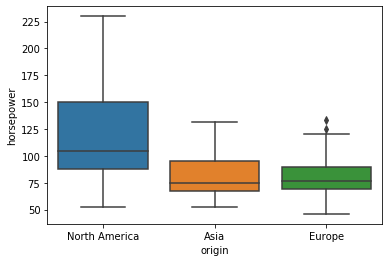

In [15]:
# Question #2: What is the horsepower by continent (origin)?
# Trend: North America has the most horsepower, which supports the fact that they have the worst gas mileage.
# Trend: Asia has more horsepower than Europe and better gas mileage than Europe.
fig = sns.boxplot(x='origin', y='horsepower', data=df)

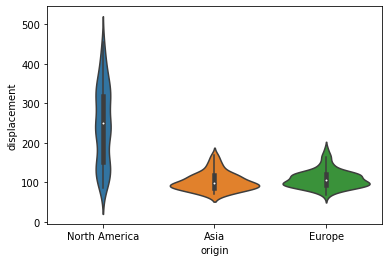

In [16]:
# Question #3: What is the displacement by continent (origin)?
# Trend: North America has the highest displacement and lowest distribution with respect to Asia and Europe. 
fig = sns.violinplot(x='origin', y='displacement', data=df)

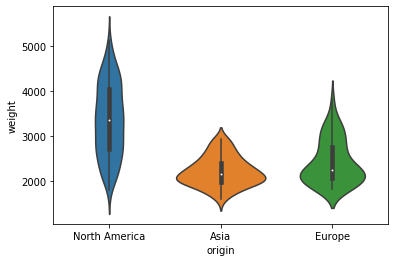

In [17]:
# Question #4: What is the weight by continent (origin)?
# Trend: North America has the highest weight and lowest distribution with respect to Asia and Europe.
fig = sns.violinplot(x='origin', y='weight', data=df)

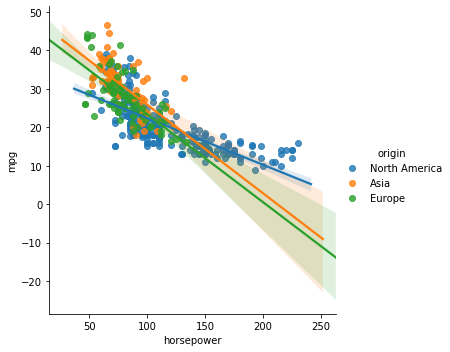

In [18]:
# Trend visualization for Question #1 and Question #2.
# Trend: North America's slope line is the flattest, 
# this indicates that gas mileage does not decrease as much as Asia and Europe when horsepower is increased. 
sns.lmplot(x="horsepower", y="mpg", hue="origin", data=df)

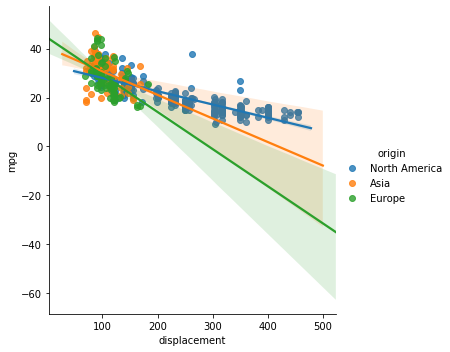

In [19]:
# Trend visualization for Question #3
# Trend: North America's slope line is the flattest, 
# this indicates that gas mileage does not decrease as much as Asia and Europe when displacement is increased.
# Trend: North America has one significant outlier with respect to mpg vs. displacement, the Oldsmobile cutlass ciera (diesel)!
sns.lmplot(x="displacement", y="mpg", hue="origin", data=df)

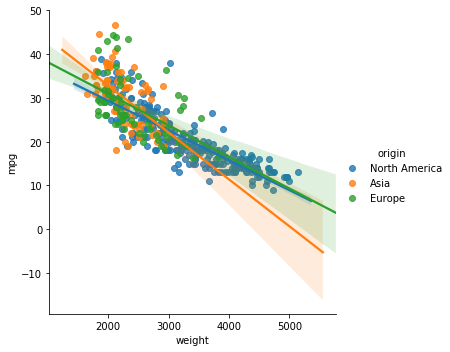

In [23]:
# Trend visualization for Question #4
# Trend: North America and Europe have similar slope lines, 
# this indicates that gas mileage decreases with weight at a similar rate, while vehicles from Asia decrease much faster. 
sns.lmplot(x="weight", y="mpg", hue="origin", data=df)

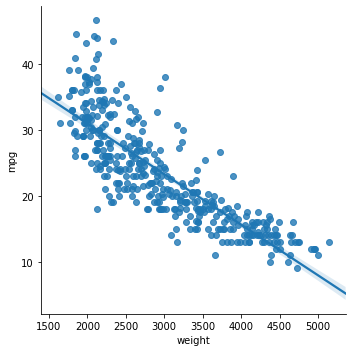

In [42]:
# Trend visualization for Question #3 with no hue by continent (origin).
# Trend: the overall regression line looks better when all datapoints are combined.
sns.lmplot(x="weight", y="mpg", data=df)

## **Descriptive/Predictive Analytics:**
1. Draw Conclusions from the Data **:**  based on descriptive statistics and visualization. 
2. Create a Predictive Model **:**  to predict mpg as a function of displacement, horsepower, weight, and continent (origin).
3. Create a $R^2$ **:**  to help evaluate if the predictive model is a good fit for the data.
4. Evaluate a Random Sample of Data **:**  by holding out 25% of the date to measure on the 'test dataset'.
5. Compare a sklearn Method to do Predictive Analytics of Data **:**  by running two models, one on the 'training dataset' and the other on the 'test dataset'.

In [24]:
# Data Cleanup: scaling data down and creating three new columns in preparation for predictive modeling.  
df['disp_div10'] = df.displacement/10
df['hp_div10'] = df.horsepower/10
df['wt_div100'] = df.weight/100

In [25]:
# Checking to ensure the three new columns were processed and added successfully. 
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'disp_div10',
       'hp_div10', 'wt_div100'],
      dtype='object')

In [26]:
# Using patsy module to create arrays from the numerical and categorical data for entry into the RandomForestRegressor.
y,X = dmatrices('mpg ~ disp_div10 + origin + hp_div10 + wt_div100', data=df)

# Splitting data into training and test datasets, implementing and 75/25 split respectively. 
train_X, test_X, train_y, test_y = \
    model_selection.train_test_split(X, y, test_size=0.25)

In [27]:
# Running RandomForestRegressor on training dataset and predicting gas mileage of the test dataset, 
# as a function of displacement, horsepower, weight, and continent.
model = sklearn.ensemble.RandomForestRegressor()
result = model.fit(train_X, train_y)

C:\Users\diego.perez-segnini\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [28]:
# Outputting the coefficient of determination R^2 for the training dataset.
# Trend: the training dataset is very well correlated with the predictive model. 
result.score(train_X, train_y)

0.9433452746373792

In [29]:
# Outputting the coefficient of determination R^2 for the test dataset.
# Trend: the test dataset is not very well correlated with the predictive model, but showing a reasonable score. 
result.score(test_X, test_y)

0.807096174959897

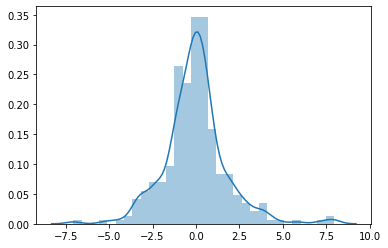

In [30]:
#Outputting the distribution plot for the training dataset. This compares the difference between actual vs. predicted mpg. 
sns.distplot(train_y.ravel() - model.predict(train_X))

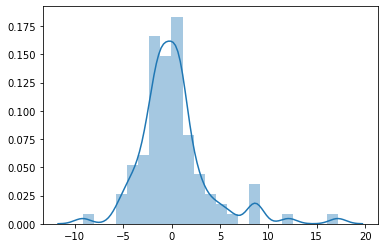

In [31]:
# Outputting the distribution plot for the test dataset. This compares the difference between the actual vs. predicted mpg, 
# based on values that the model has not seen yet (the test dataset).
# Trend: the test dataset is not very well correlated with the predictive model, but it is reasonable. 
sns.distplot(test_y.ravel() - model.predict(test_X))

Text(0.5, 1.0, 'MPG ~ Weight (training dataset)')

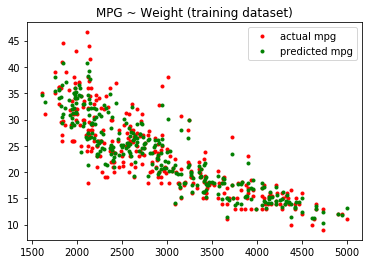

In [32]:
# Running predictive model to show actual mpg vs. predicted mpg as a function of weight, and scaling weight back (*100).  
plt.plot(train_X[:,5]*100, train_y, 'r.')
plt.plot(train_X[:,5]*100, model.predict(train_X), 'g.')
plt.legend(['actual mpg', 'predicted mpg'])
plt.title('MPG ~ Weight (training dataset)')

Text(0.5, 1.0, 'MPG ~ Weight (test dataset)')

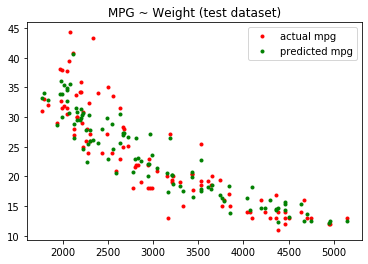

In [33]:
# Running predictive model to show actual mpg vs. predicted mpg as a function of weight, and scaling weight back (*100).  
plt.plot(test_X[:,5]*100, test_y, 'r.')
plt.plot(test_X[:,5]*100, model.predict(test_X), 'g.')
plt.legend(['actual mpg', 'predicted mpg'])
plt.title('MPG ~ Weight (test dataset)')

Text(0.5, 1.0, 'MPG ~ Horsepower ')

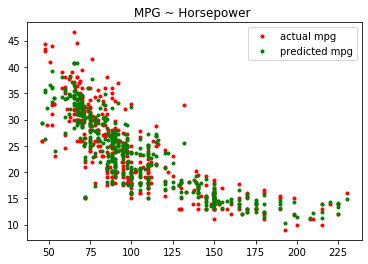

In [34]:
# Running predictive model to show actual mpg vs. predicted mpg as a function of horsepower, and scaling weight back (*10).
plt.plot(X[:,4]*10, y, 'r.')
plt.plot(X[:,4]*10, model.predict(X), 'g.')
plt.legend(['actual mpg', 'predicted mpg'])
plt.title('MPG ~ Horsepower ')

Text(0.5, 1.0, 'MPG ~ Displacement ')

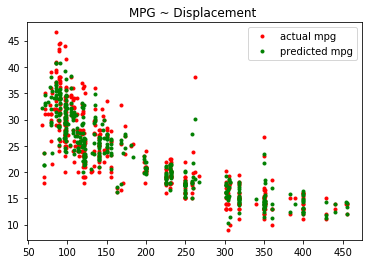

In [35]:
# Running predictive model to show actual mpg vs. predicted mpg as a function of displacement, and scaling weight back (*10).
plt.plot(X[:,3]*10, y, 'r.')
plt.plot(X[:,3]*10, model.predict(X), 'g.')
plt.legend(['actual mpg', 'predicted mpg'])
plt.title('MPG ~ Displacement ')

In [36]:
# Creating columns for a new data frame to be used with the predictive model. 
cols = ['origin', 'disp_div10', 'wt_div100', 'hp_div10', 'mpg']

# Passing-in new (scaled) data values based on averages from actual data and preparing to utilize the predictive model. 
data = [['North America', 25, 34, 12, 20],
       ['Asia', 10, 22, 8, 30],
       ['Europe', 11, 24, 8, 28]]

# Creating the new data frame and utilizing the new set of columns. 
dfnew = pd.DataFrame(data, columns=cols)

In [37]:
# Creating a different set of dmatrices and checking to ensure all features are included (all three continents 'origins'. 
y,X = dmatrices('mpg ~ disp_div10 + origin + hp_div10 + wt_div100', data=dfnew)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))

y:(3, 1)
X:(3, 6)


In [38]:
# Predicting the mpg that an average vehicle would get from each continent, North America, Asia, and Europe respectively.
# These predictions are based on the new data that is being passed-in above. 
model.predict(X)

array([18.25, 27.89, 29.28])

**Final Predictive Analytics and Conclusion:**
1. I conclude that North America had a very extensive line of vehicles from economy through large vehicles, and that North American vehicles were very consistent with mpg as a function of their size/weight (i.e. the regression lines shown in blue below support very good predication of gas mileage (mpg) as a function of vehicle size parmaters such as weight, displacement, and horsepower).
2. Due to the small variation in size of Asia and European vehicles, the predictive regresssion lines shown in orange and green below are not nearly supportive of acccurate predictions of gas mileage (mpg) as we see in North American vehicles.

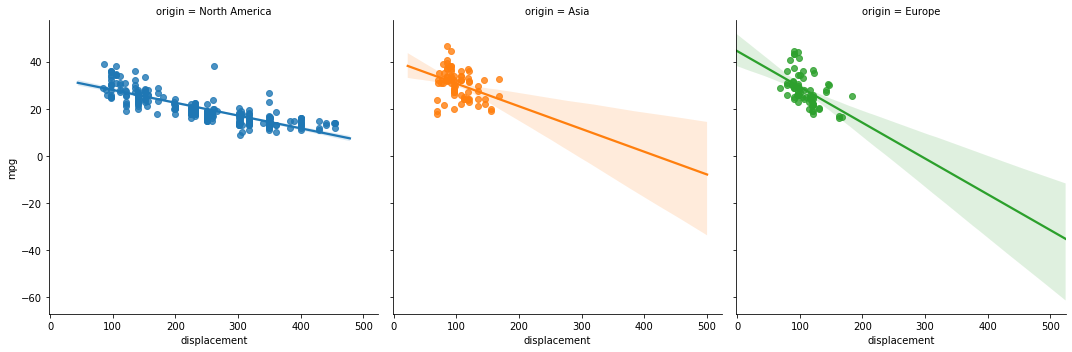

In [39]:
# Regression lines of mpg as a functon of displacement for each continent (origin).
_ = sns.lmplot(x="displacement", y="mpg", hue = 'origin', col="origin", data=df)

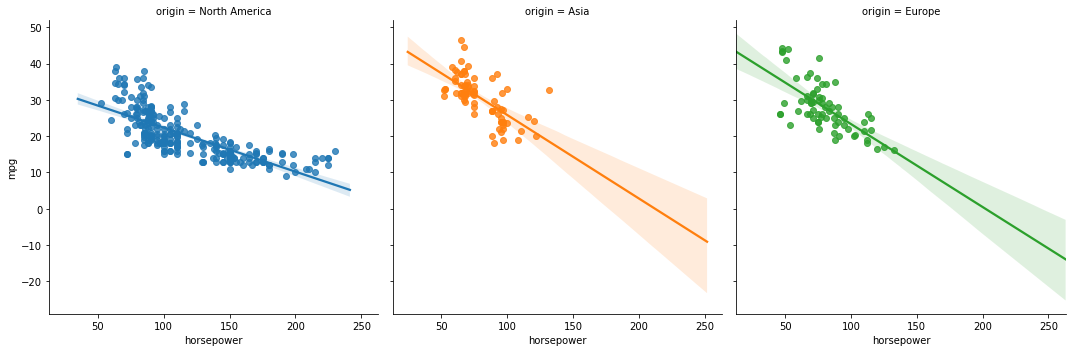

In [40]:
# Regression lines of mpg as a functon of horsepower for each continent (origin).
_ = sns.lmplot(x="horsepower", y="mpg", hue = 'origin', col="origin", data=df)

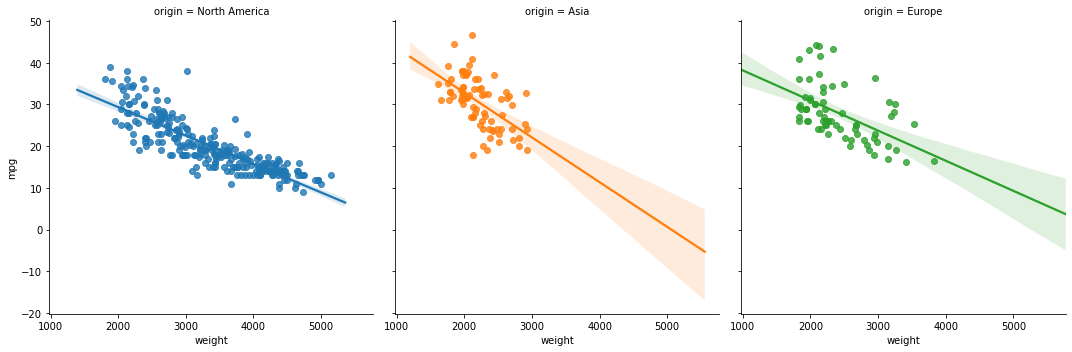

In [41]:
# Regression lines of mpg as a functon of weight for each continent (origin).
_ = sns.lmplot(x="weight", y="mpg", hue = 'origin', col="origin", data=df)